Hangman: Guessing the next best letter

This project uses probability to guess the next letter of hangman given the already guessed letters.

Written by Connor Gag

In [1]:
import pandas as pd
from IPython.display import Image


There are two important formulas. First, the posterior probability:

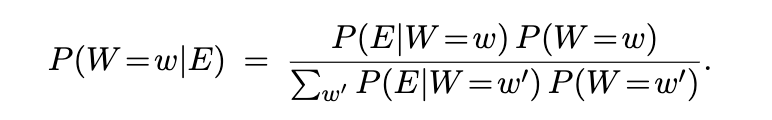

In [2]:
img = Image("posterior_probability.png")
img

Second, the predictive probability, we takes the first formula as an input

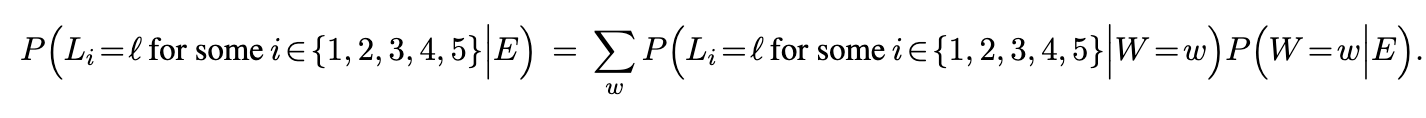

In [3]:
img = Image("predictive_probability.png")
img

We'll read in a courpus of words from New York Times articles so that we can base our probabilities off of that.

In [194]:
with open('word_counts_file.txt', 'r') as f:
    content = f.readlines()

In [195]:
# Create and initialize df
data = [line.split() for line in content]
counts_df = pd.DataFrame(data, columns=['words', 'count'])
counts_df['count'] = counts_df['count'].astype(int)

In [196]:
counts_df

,words,count
0,AARON,413
1,ABABA,199
2,ABACK,64
3,ABATE,69
4,ABBAS,290
...,...,...
6530,ZVIAD,30
6531,ZWEIG,44
6532,ZWICK,34
6533,ZYCIE,14


In [198]:
# single word count out of all of the word counts
counts_df['prior_probability'] = counts_df['count'] / counts_df['count'].sum()

In [199]:
# 15 most common words
counts_df.nlargest(15, 'prior_probability')['words']


5821    THREE
5102    SEVEN
1684    EIGHT
6403    WOULD
18      ABOUT
5804    THEIR
6320    WHICH
73      AFTER
1975    FIRST
1947    FIFTY
4158    OTHER
2073    FORTY
6457    YEARS
5806    THERE
5250    SIXTY
Name: words, dtype: object

In [201]:
# 14 least common words
counts_df.nsmallest(14, 'prior_probability')['words']

712     BOSAK
895     CAIXA
3554    MAPCO
4160    OTTIS
5985    TROUP
977     CCAIR
1107    CLEFT
1842    FABRI
2041    FOAMY
3978    NIAID
4266    PAXON
5093    SERNA
5872    TOCOR
6443    YALOM
Name: words, dtype: object

In [202]:
counts_df

,words,count,prior_probability
0,AARON,413,0.000054
1,ABABA,199,0.000026
2,ABACK,64,0.000008
3,ABATE,69,0.000009
4,ABBAS,290,0.000038
...,...,...,...
6530,ZVIAD,30,0.000004
6531,ZWEIG,44,0.000006
6532,ZWICK,34,0.000004
6533,ZYCIE,14,0.000002


In [4]:
# Returns the probability that the missing word is the correct word.
def probOfW(word): # P(W =w)
    return counts_df[counts_df['words'] == word]['prior_probability'].item()

In [255]:
# Probability of the letter being in the given word (true or false)
# Returns 1 or 0
def probOfLetterGivenW(letter, word): # P(Li for some l in {1,2,3,4,5} |W = w)
    if (letter in word):
        return 1
    else:
        return 0

In [302]:
# Checks to see if the given word is consistent with the evidence given. 
def probOfEvidGivenW(evidence, word): # P(E|W =w)
    # Checks that all correct guesses are actually correct
    if (((evidence['l1'] == word[0] or evidence['l1'] == "")\
         and (evidence['l2'] == word[1] or evidence['l2'] == "") \
         and (evidence['l3'] == word[2] or evidence['l3'] == "") \
         and (evidence['l4'] == word[3] or evidence['l4'] == "") \
         and (evidence['l5'] == word[4] or evidence['l5'] == "")\
        ) == False):
        return 0
    
    # Make sure the occurrences are correct
    # Example
    # A---S 
    # ABYSS
    guessed_word = evidence['l1'] + evidence['l2'] + evidence['l3'] + evidence['l4'] + evidence['l5']
    for i in guessed_word:
        if guessed_word.count(i) != word.count(i):
            return 0
    
    # Are all of the wrong guesses actually wrong
    for i in evidence['wrong_guesses']:
        if i in word:
            return 0
    return 1

In [312]:
# Calculate the next letter given some evidence (past choices)
def next_letter(evidence, counts_df): 
    # start with the bottom half of the formula
    all_possible_words = list(counts_df['words'].unique())
    print(len(all_possible_words))
    bottom_sum = 0
    for bottom_word in all_possible_words:
        bottom_sum = bottom_sum + (probOfEvidGivenW(evidence, bottom_word) * probOfW(bottom_word)) # term 1 * term 2

    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    # don't go through guessed letters
    everthing_to_guess = [i for i in alphabet if i not in list(set([evidence["l1"], evidence["l2"], evidence["l3"], evidence["l4"], evidence["l5"]] + evidence['wrong_guesses']))]
    max_sum = 0
    max_letter = ""
    for letter in everthing_to_guess:
        sum = 0
        for word in all_possible_words:
            # Calculate top for each word (word_one)
            top = probOfLetterGivenW(letter, word) * probOfEvidGivenW(evidence, word) * probOfW(word) # term 3 * term 1 * term 2
            sum = sum + (top / bottom_sum)
        if (sum > max_sum):
            max_sum = sum
            max_letter = letter
    print("Max Sum: " + str(max_sum))
    return max_letter

In [320]:
evidence = {'l1': "", 'l2': "", 'l3': "", 'l4': "", 'l5': "", 'wrong_guesses': []}
next_letter(evidence, counts_df)

6535
Max Sum: 0.5394172389647948


'E'

In [321]:
evidence = {'l1': "", 'l2': "", 'l3': "", 'l4': "", 'l5': "", 'wrong_guesses': ["E", "A"]}
next_letter(evidence, counts_df)

6535
Max Sum: 0.5340315651557679


'O'

In [322]:
evidence = {'l1': "A", 'l2': "", 'l3': "", 'l4': "", 'l5': "S", 'wrong_guesses': []}
next_letter(evidence, counts_df)

6535
Max Sum: 0.7715371621621622


'E'

In [323]:
evidence = {'l1': "", 'l2': "", 'l3': "O", 'l4': "", 'l5': "", 'wrong_guesses': ["A", "E", "M", "N", "T"]}
next_letter(evidence, counts_df)

6535
Max Sum: 0.7453866259829711


'R'

In [324]:
evidence = {'l1': "D", 'l2': "", 'l3': "", 'l4': "I", 'l5': "", 'wrong_guesses': []}
next_letter(evidence, counts_df)

6535
Max Sum: 0.8206845238095241


'A'

In [319]:
evidence = {'l1': "", 'l2': "U", 'l3': "", 'l4': "", 'l5': "", 'wrong_guesses': ["A", "E", "I", "O", "S"]}
next_letter(evidence, counts_df)

6535
Max Sum: 0.6269651101630528


'Y'